In [1]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age']=df['Age'].fillna(value=df['Age'].mean())

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

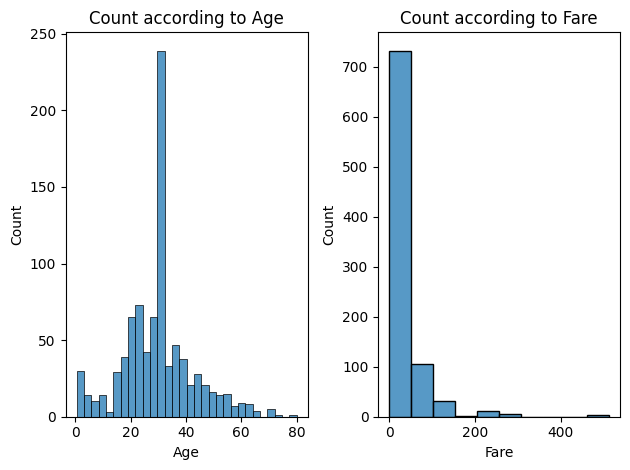

In [14]:
plt.subplot(1,2,1)
plt.title("Count according to Age")
sns.histplot(data=df,x='Age')
plt.subplot(1,2,2)
plt.title("Count according to Fare")
#binwidth is used for increasing the width of bar
#bins is used to represent number of bars to have between two values
# sns.histplot(data=df,x="Fare",binwidth=20,bins=10)
sns.histplot(data=df,x="Fare",bins=10)
#for having space between the subplots
plt.tight_layout()
plt.show()

In [29]:
print("Conclusions from above plots are : ")
print("1) Peolple with age between 20-40 has highest count on the ship ")
print("2) Most of the people paid Fare between 0-40")

Conclusions from above plots are : 
1) Peolple with age between 20-40 has highest count on the ship 
2) Most of the people paid Fare between 0-50


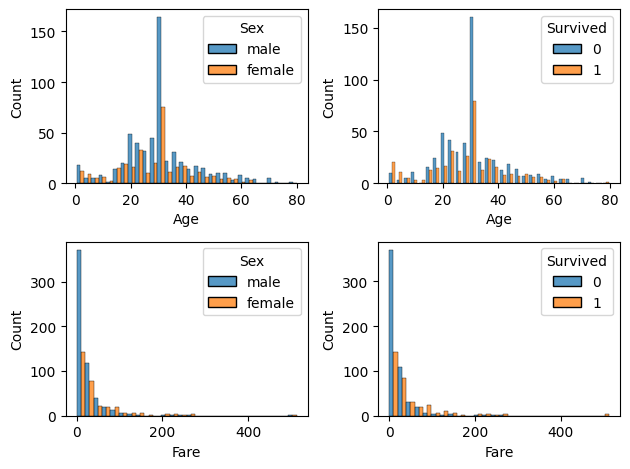

In [15]:
plt.subplot(2,2,1)
#multiple="dodge" is use to represent the male and female side by side instead of in one stack
sns.histplot(data=df,x='Age',hue='Sex',multiple="dodge")
plt.subplot(2,2,2)
sns.histplot(data=df,x='Age',hue='Survived',multiple="dodge",shrink=.8)
plt.subplot(2,2,3)
#log scale allows you to better understand the distribution without needing to create very stretched visualizations.
# sns.histplot(data=df,x='Fare',hue='Sex',multiple="dodge",shrink=.8,log_scale=2)
#Note- 1 represents survived while 0 represents died
sns.histplot(data=df,x='Fare',hue='Sex',multiple="dodge",binwidth=20,bins=10)
plt.subplot(2,2,4)
# sns.histplot(data=df,x='Fare',hue='Survived',multiple="dodge",shrink=.8,log_scale=2)
sns.histplot(data=df,x='Fare',hue='Survived',multiple="dodge",binwidth=20,bins=10)
plt.tight_layout()
plt.show()

In [32]:
print('Conclusions from the above plots are : ')
print("1) Males and Females from age group 20-40 has the highest count on the ship. But comparatively Males are more than Femlaes")
print("2) Survival rate is less in every age group")
print("3) The count of males who paid fare between 0-150 are more compare to females")
print("4) THe Survival rates is less of people who paid more fare than the people who paid fare between 0-10")

Conclusions from the above plots are : 
1) Males and Females from age group 20-40 has the highest count on the ship. But comparatively Males are more than Femlaes
2) Survival rate is less in every age group
3) The count of males who paid fare between 0-150 are more compare to females
4) THe Survival rates is less of people who paid more fare than the people who paid fare between 0-10
